In [68]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [69]:
#Load the data
forestfires = pd.read_csv("C:/Users/Swetha/Downloads/forestfires.csv")

In [70]:
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [71]:
#To understand the datatypes
forestfires.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [72]:
#Drop the columns month and day
forestfires = forestfires.drop(['month'], axis=1)
forestfires = forestfires.drop(['day'], axis=1)
forestfires.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [73]:
# Dataset Categorical variables encoding
forestfires['size_category'] = forestfires['size_category'].map({'small':0, 'large':1})

<AxesSubplot:>

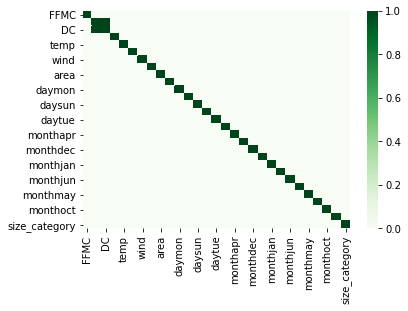

In [74]:
#Correlation matrix
sns.heatmap(forestfires.corr()>0.6, cmap='Greens')

In [75]:
#Checking for the null attributes
forestfires.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [76]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.268859
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

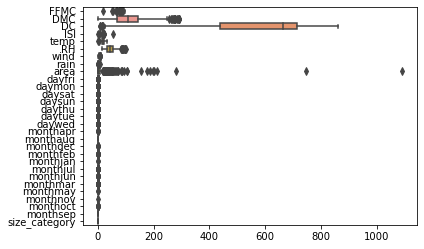

In [77]:
# Boxplot
sns.boxplot(data = forestfires, orient = "h")

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


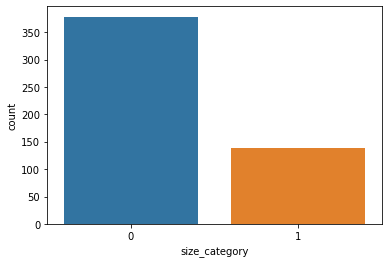

In [78]:
sns.countplot(forestfires['size_category'])
plt.show()


In [79]:
# Splitting dataset
X = forestfires.drop(['size_category'], axis=1)
y = forestfires['size_category']

In [80]:
# Transformation MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [82]:
# Splitting data into train & test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.2, random_state=42 )

In [83]:
((X_train.shape, y_train.shape),(X_test.shape, y_test.shape))

(((413, 28), (413,)), ((104, 28), (104,)))

In [84]:
# # Neural Network Model
# generating the data set
from sklearn.datasets import make_classification
X, y = make_classification(n_features =2, n_redundant =0, n_informative=2, random_state=3)

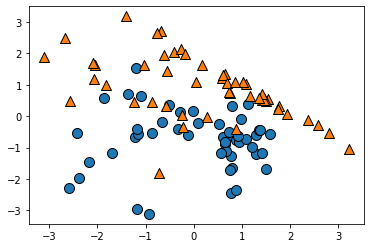

In [85]:
# Visualization
plt.scatter(X[y==0][:,0], X[y==0][:,1], s=100, edgecolors='k')
plt.scatter(X[y==1][:,0], X[y==1][:,1], s=100, edgecolors='k', marker='^')
plt.show()

In [86]:
# MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [87]:
# ###### Getting mlp score

In [88]:
from sklearn.neural_network import MLPClassifier
X, y = make_classification(n_features =2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.64


In [89]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,50))

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
#increasing the hidden layers gives more accuracy
clf = MLPClassifier(activation ='relu',solver='lbfgs', alpha=0.0001,hidden_layer_sizes=(3), random_state=1)
clf.fit(X,y)

MLPClassifier(hidden_layer_sizes=3, random_state=1, solver='lbfgs')

In [62]:
pred_values = clf.predict(X)
print(pred_values)

[0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0
 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1]


In [63]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
confusion_matrix = confusion_matrix(y,pred_values)
confusion_matrix

array([[45,  5],
       [ 8, 42]], dtype=int64)

In [65]:
classification_report = classification_report(y,pred_values)
print(classification_report)


              precision    recall  f1-score   support

           0       0.85      0.90      0.87        50
           1       0.89      0.84      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [66]:
print("Accuracy:",metrics.accuracy_score(y,pred_values))

Accuracy: 0.87


In [67]:
# ###### This model we have accuracy of 87%